#  Playing with pandas



Sources for this playground is the standard library pandas and input from kaggle tweet desaster or other webpages

---



## 1.Mount drive

In [1]:
#Mount Google Drive as folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Update to tables library-pandas need that to avoid write errors

In [2]:
!pip install --upgrade tables

     |████████████████████████████████| 4.3 MB 5.0 MB/s 
  Attempting uninstall: tables
    Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


## 2. Loading libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('/content/drive/MyDrive/pandas-playground/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


## 3.Checking for missing values

In [5]:
missing_values= df.isnull().sum().sort_values(ascending= False)/len(df)
print(len(missing_values[missing_values>0]), 'are with missing values' )
print(missing_values[missing_values>0])

2 are with missing values
location    0.332720
keyword     0.008013
dtype: float64


In [6]:
df.sample(5)

,id,keyword,location,text,target
4267,6061,heat%20wave,Malaysia/Jordan,It's kinda cool tonight. Is the heat wave fina...,1
176,252,ambulance,West Wales,Anyone travelling Aberystwyth-Shrewsbury right...,1
5699,8133,rescued,NaN,Rescued TB goes on to ribbon at HITS: http://t...,0
4948,7052,meltdown,Hustletown,@tinybaby @adultblackmale @mattytalks meltdown...,1
606,875,bioterror,NaN,FedEx no longer to transport bioterror germs i...,0


## Filling na to avoid the problems with all types of string functions ill na it looks as it should be a str type so with empty '' teh best way is to use earlier prepared dictionary what shpould be replaced


In [7]:
{x:'' for x in list(df.columns)}

{'id': '', 'keyword': '', 'location': '', 'target': '', 'text': ''}

In [8]:
fillna_dict={'keyword': '', 'location': '', 'text': ''}

In [9]:
{x:'str' for x in list(df.columns)}

{'id': 'str',
 'keyword': 'str',
 'location': 'str',
 'target': 'str',
 'text': 'str'}

In [10]:
fill_astype_dict={ 'keyword': 'str',
 'location': 'str',
 'text': 'str',}

In [11]:
df= df.fillna(fillna_dict)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [13]:
df= df.astype(fill_astype_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [14]:
df.sample(7)

,id,keyword,location,text,target
3954,5621,flooding,Metro Manila,@adorableappple No reported flooding po in the...,0
2984,4288,drowning,,can still see it...blank expression...cheeks c...,0
5845,8351,ruin,austin tx,i'm really sad about red 7 closing :( yuppies ...,0
6961,9986,tsunami,#ODU,@TSUNAMI_nopeach ?????? I'm weak af,0
5553,7924,rainstorm,Federal Capital Territory,Rainstorm Destroys 600 Houses In Yobe | iRepor...,1
728,1051,bleeding,,I waited 2.5 hours to get a cab my feet are bl...,1
6115,8729,sinking,,Sinking carb consultative assembly plans could...,0


In [15]:
list(df.columns)

['id', 'keyword', 'location', 'text', 'target']

## Making sure that content is utf-8 so decode/encode routine done 

In [16]:
# df= df.encode('utf-8', 'ignore').decode('utf-8')

for a in ['keyword', 'location', 'text']:
    df[a].apply(lambda x: x.encode('utf-8', 'ignore').decode('utf-8'))

In [17]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [18]:
df['text_len']= df['text'].apply(lambda x: len(x))

In [19]:
df.sample(5)

,id,keyword,location,text,target,text_len
4831,6878,mass%20murder,,He made such a good point. White person coming...,0,135
5888,8409,sandstorm,United States,Watch This Airport Get Swallowed Up By A Sands...,1,91
2764,3970,devastation,"Victoria, British Columbia",@Pam_Palmater i agree with @perrybellegarde to...,1,143
1667,2409,collide,"Melton, GA",Somehow find you and I collide http://t.co/Ee8...,0,53
3779,5367,fire%20truck,,#reno Truck trailer catches fire in Reno http:...,1,63


## filtering values in particular column a bit mor than a simple filter using $ 

In [70]:
df[(df['text_len']>7) &  (df['text_len']<120)  &  (df['keyword'].str.contains('hazard'))]

,id,keyword,location,text,target,text_len,log_likelihood,text_all
4179,5935,hazard,,@ClassyColkett Thorgan Hazard made his move pe...,0,82,-22201.134099,hazard @ClassyColkett Thorgan Hazard made his...
4180,5937,hazard,Australia,#Lifestyle Û÷It makes me sickÛª: Baby clothe...,0,115,-22242.086361,hazard Australia #Lifestyle Û÷It makes me sic...
4181,5938,hazard,,@LongBreastYat Yeah I don't think he's elite e...,0,108,-22226.307394,hazard @LongBreastYat Yeah I don't think he's...
4182,5939,hazard,"Alameda, CA",Choking Hazard Prompts Recall Of Kraft Cheese ...,1,76,-22231.453281,"hazard Alameda, CA Choking Hazard Prompts Reca..."
4183,5942,hazard,"London, England",Seeing Hazard without the beard like... http:/...,0,62,-22202.849903,"hazard London, England Seeing Hazard without t..."
4184,5943,hazard,Arizona,Get that hazard pay,0,19,-22183.270177,hazard Arizona Get that hazard pay
4186,5947,hazard,a van down by the river,@phiddleface NOT IF THERES A CHOKING HAZARD!!!...,0,81,-22209.152241,hazard a van down by the river @phiddleface NO...
4187,5949,hazard,,Road Hazard @ CASCADE RD SW / CHILDRESS DR SW ...,0,68,-22222.421419,hazard Road Hazard @ CASCADE RD SW / CHILDRES...
4191,5954,hazard,,The Eden Hazard of Hockey https://t.co/RbbnjkoqUD,0,49,-22197.979347,hazard The Eden Hazard of Hockey https://t.co...
4192,5955,hazard,Chicago,CONFIRMED: Sanchez Hazard and Bolasie will be ...,1,101,-22207.260092,hazard Chicago CONFIRMED: Sanchez Hazard and B...


In [72]:
df.loc[4234].text

'@TheBlackshag @dannyoneil too toxic...cancer....disease...hazardous waste...noxious...'

In [21]:
df.describe()

,id,target,text_len
count,7613.000000,7613.00000,7613.000000
mean,5441.934848,0.42966,101.037436
std,3137.116090,0.49506,33.781325
min,1.000000,0.00000,7.000000
25%,2734.000000,0.00000,78.000000
50%,5408.000000,0.00000,107.000000
75%,8146.000000,1.00000,133.000000
max,10873.000000,1.00000,157.000000


## Using standard lda library fro sklearn

Latent Dirichlet Allocation is a form of unsupervised Machine Learning that is usually used for topic modelling in Natural Language Processing tasks. It is a very popular model for these type of tasks and the algorithm behind it is quite easy to understand and use. Also, the Scikit-Learn library has a very good implementation for the algorithm,


Topic Modelling is an unsupervised Machine Learning task where we try to discover "abstract topics" that can describe a collection of documents. This means we have a collection of texts and we try to find patterns of words and phrases that can help us cluster the documents and group them by "topics".

I put topics into quotes and I call them abstract topics because these are not obvious topics and we don't need them to be. We work on the assumption that similar documents will have similar patterns of words and phrases

For example, let's say we have a collection of 100 texts. We go through each text and discover that ten of them contain words like "machine learning", "training", "supervised", "unsupervised", "dataset" and so on. We may not know what these words mean and we really don't care.

We only see a pattern here, that 10% of our articles contain these words and we conclude that they should be included in the same topic. We can't actually name the topic and again, this is not needed. We are able to cluster these 10 articles into the same topic. And when we get a new text which we have never seen before, we look into it, we find it contains some of these words, then we'll be able to say "hey, this goes into the same category with the other 10 articles!"


---

Latent Dirichlet Allocation algorithm works with a few simple steps. The only preprocessing we need to do is the one we do in almost all text processing tasks: removing the stopwords(words that, with a high probability, are found in most of the documents and don't bring any value)  from all of our documents.

  * Establish a number of n topics that will be identified by the LDA algorithm. How can we find the perfect number of topics? Well, it's not very easy and it's usually a trial and error process: we try different values for n until we are satisfied with the results. Or, maybe we are lucky and we have other information about the dataset that allows us to establish the perfect number of topics.
  * Assign every word in every document to a temporary topic. This temporary topic will be random at first, but will be updated in the next step.
  * For this step we will go through every document and then every word in that document and compute 2 values

the probability that this document belongs to a certaintopic; this is based on how many words(except the currrent word) from this document belong to the topic of the current word

the proportion of documents that are assigned to the topic of the current word because of the current word.

In [22]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [23]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(
    stop_words='english',
    ngram_range=(1,1),
    max_df=0.9,
    min_df=2,
    max_features=10000,
    binary=False
)

lda = LatentDirichletAllocation(
    n_components=10,
    doc_topic_prior=None,  #defaults to 1/n_components; called alpha
    n_jobs=-1,
    max_iter=50,
    random_state=2020
)

In [24]:
count_vec=count_vectorizer.fit_transform(df.text)

In [25]:
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(count_vec)
doc_vectors = lda.transform(count_vec)

### Calculate the likelihood of the documents

Given the topic model, we can talk about the likelihood of a document give our corpus topic distribution. Now we calculate the likelihood of the documents under the topic model. Then this enables us to drop or flag unlikely documents.

In [26]:
log_likelihoods = [lda.score(d) for d in count_vec]

In [27]:
df["log_likelihood"] = log_likelihoods

In [28]:
df.sample(7)

,id,keyword,location,text,target,text_len,log_likelihood
2305,3308,demolished,"Terre Haute, IN",I bought a 64oz jar of peanut butter and it's ...,0,69,-22217.411312
3698,5262,fear,"Chippenham/Bath, UK",Fear Factory in December. Done deal.,0,36,-22202.196814
4495,6392,hurricane,,@Hurricane_Dolce happy birthday big Bruh,0,40,-22209.006834
3075,4411,electrocute,,@i_electroCute your turn ??,0,27,-22176.296736
6458,9239,suicide%20bombing,,Remembering Marlene Menahem 22 of Moshav Safsu...,1,123,-22250.897769
6193,8840,sirens,"Ventura, Ca",Kyle is one of the last people I would expect ...,0,75,-22211.482035
4687,6663,landslide,London,11:30BST traffic: A10&gt;Paris A40 Geneva A7 M...,1,124,-22250.217667


In [29]:
figsize=(15,5)
plt.hist(['log_likehood'], bins=100) / #here I did mistake and didnt put df and there is strange error

SyntaxError: ignored

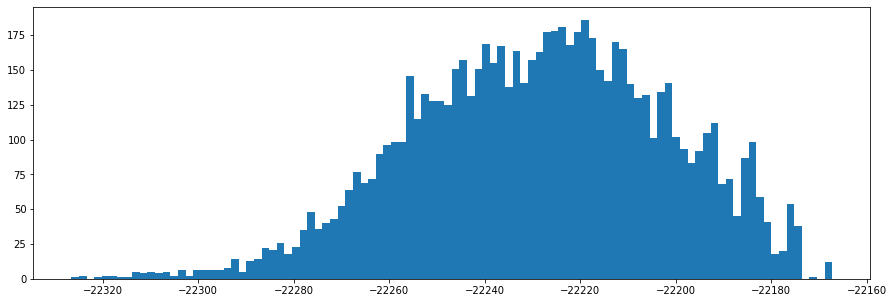

In [30]:
plt.figure(figsize=(15,5))
plt.hist(df["log_likelihood"], bins=100);

or using directly df

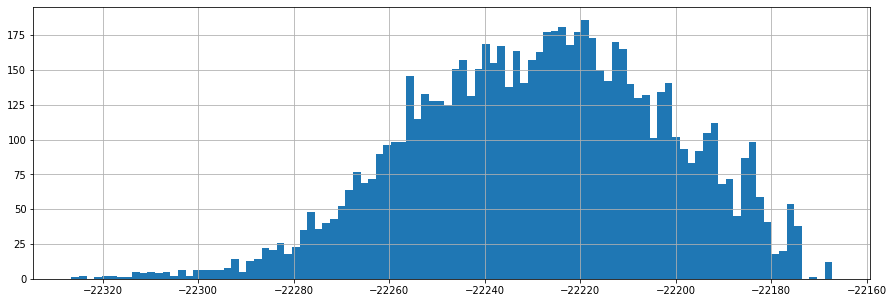

In [31]:
df.log_likelihood.hist(bins=100, figsize=(15,5));

Here we can pick a reasonable threshold to invalidate documents. We just pick −32140-32140−32140 here, more sophisticated approaches can be used to determine a threshold.

Let’s look at some low probability examples.

In [32]:
for a in df[df['log_likelihood']< -22300].text.sample(5).to_list():
    print(a)

USGS EQ: M 1.2 - 23km S of Twentynine Palms California: Time2015-08-05 23:54:09 UTC2015-08-05 16:... http://t.co/T97JmbzOBO #EarthQuake
Conditions for Paris FR at 4:00 am CEST: Current Conditions:
Fair 68 FForecast:
Thu - Sunny. High: 87 Low: 61
Fri - PM Thunderstorm...
USGS EQ: M 1.9 - 5km S of Volcano Hawaii: Time2015-08-06 01:04:01 UTC2015-08-05 15:04:01 -10:00 a... http://t.co/3rrGHT4ewp #EarthQuake
UNR continues Severe Thunderstorm Warning [wind: 60 MPH hail: &lt;.75 IN] for Weston [WY] and Custer Fall River Pennington [SD] till 7:15 PÛ_
http://t.co/Ns1AgGFNxz #shoes Asics GT-II Super Red 2.0 11 Ronnie Fieg Kith Red White 3M x gel grey volcano 2 http://t.co/oD250zshFy


In [33]:
for a in df[df['log_likelihood']> -22260].text.sample(5).to_list():
    print(a)

FedEx no longer will ship potential bioterror pathogens - Atlanta Business Chronicle http://t.co/YLLQJljiIQ
@marek1330 *Zar cringes at the blows but doesn't let Marek go* *He uses Seismic Toss
Megadeth-Symphony of Destruction http://t.co/xzfxRgLAlp
Flood Advisory issued August 05 at 7:10PM CDT until August 05 at 8:00PM CDT by NWS: ...THE URBAN AND ... http://t.co/SeMw5cQ7Dg #weather
late night mcdonalds with friends = hilarious although my car is wrecked and there's half a steak pastie in the industrial estate


How would a random sentence from the new york times score?

In [34]:
text = """
    this is very simple text should be from thotaly different fable lest see
    what LDA would say.
"""
test_count_data = count_vectorizer.transform([text])
test_log_likelihood = lda.score(count_vec)

print(test_log_likelihood)

-489148.8739650735


this is really unlikely! So it looks like our approach is going in the right direction.

##  concatenating columns

In [42]:
df.sample(20)

,id,keyword,location,text,target,text_len,log_likelihood,text_all
3241,4657,engulfed,"Glendale, CA",#TRAFFICALERT Eastbound 210 Freeway at Citrus...,1,140,-22243.009679,"engulfed Glendale, CA #TRAFFICALERT Eastbound..."
3406,4876,explode,,Whether you like it or not everything comes ou...,0,96,-22214.052490,explode Whether you like it or not everything...
325,471,armageddon,"Florida, USA",Vladimir Putin Issues Major Warning But Is It ...,1,99,-22233.880037,"armageddon Florida, USA Vladimir Putin Issues ..."
233,332,annihilated,PA,Officially skipping out on #FantasticFour/#Fan...,0,122,-22242.668446,annihilated PA Officially skipping out on #Fan...
497,720,attacked,,im feeling attacked http://t.co/91jvYCxXVi,0,42,-22195.121386,attacked im feeling attacked http://t.co/91jv...
1096,1585,bombed,New York,The U.S. bombed Hiroshima 70 years ago today. ...,1,128,-22231.673554,bombed New York The U.S. bombed Hiroshima 70 y...
5165,7366,obliterate,United Kingdom,WWE 2K15: Universe Mode - Part 149 - OBLITERAT...,0,86,-22223.447881,obliterate United Kingdom WWE 2K15: Universe M...
3330,4770,evacuated,Florida,They evacuated the mall. Again. ??,1,34,-22186.233563,evacuated Florida They evacuated the mall. Aga...
3605,5146,fatal,,Tell me why or why not\nto adopt in this way\n...,0,101,-22198.183751,fatal Tell me why or why not\nto adopt in thi...
2645,3797,destruction,denver colorado,it sure made an impact on me http://t.co/GS50D...,0,51,-22188.461315,destruction denver colorado it sure made an im...


In [41]:
df['text_all']= df.apply(lambda x: x['keyword'] +' ' +x['location']+' ' +x['text'], axis=1)

## Group by

In [69]:
df.groupby(['location','keyword', 'target' ])['keyword',].agg(np.size).sort_values(ascending= False).head(60)

location  keyword               target
                                1         42
          razed                 1         24
                                0         19
          suicide%20bomber      1         19
          detonation            0         18
          body%20bags           0         18
          nuclear%20disaster    1         18
          twister               0         17
          army                  0         17
          blizzard              0         17
USA       sandstorm             1         17
          rescuers              1         16
          sinking               0         16
          smoke                 0         16
          wrecked               0         16
          blood                 0         15
          debris                1         15
          blazing               0         14
          forest%20fires        1         14
          derailment            1         14
          bombing               1         14
          explod

In [ ]:
temp_table= data['Name'].str.split(" ", n=1, expand=True)
temp_table

In [ ]:
data['First Name']= temp_table[0]
data['Last Name']= temp_table[1]

In [ ]:
clean_dict={'%':''}

In [ ]:
df1= df1.replace(clean_dict, regex=True)

In [ ]:
df1.loc[2], df1.iloc[2]

## ast.literal.eval() to restore original data type

In [ ]:
df.ast.literal.eval()

In [ ]:
def read_harry_potter():
    lines = []
    with open("../input/harry_potter.txt", "r") as f:
        for line in f.readlines():
            line = line.replace("\n", " ")
            if line:
                lines.append(line)
                
    return "".join(lines)

In [ ]:
text=read_harry_potter()

In [ ]:
df['words_len'] = df['text'].map(lambda x: len(x))

for percentile in [50, 75, 90, 95, 98, 99, 100]:
    print(percentile, np.percentile(df['words_len'], percentile))
    
df['words_len'].hist(bins=50);

In [ ]:
df_light = df.sample(frac=0.1)

In [ ]:
df['Product'].value_counts()

In [ ]:
df['label'] = df['target']
df['target'] = df['target'].factorize()[0]
df['doc_id'] = df.index